# Predicting Customer Satisfaction - Ecommerce Data
Olist has released a dataset of 100k orders made between 2016 and 2018. Lets create a model to predict what's the score a customer will give for an order.

# 1. Exploratory Data Analysis
Some **EDAs (Exploratory Data Analysis)** were already made by other users and are publicly available at the dataset's kernels. That's why we're going to skip much of the EDA and jump into the problem[](http://). We recommend the following EDAs:
* [E-Commerce Exploratory Analysis](https://www.kaggle.com/jsaguiar/e-commerce-exploratory-analysis) by [Aguiar](https://www.kaggle.com/jsaguiar)
* [Data Cleaning, Viz and Stat Analysis on e-com](https://www.kaggle.com/goldendime/data-cleaning-viz-and-stat-analysis-on-e-com) by [Azim Salikhov](https://www.kaggle.com/goldendime)

Those analysis help us understand what is happening with data. After we are confortable with it, and confident of its value we may start working on bigger problems. 

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [96]:
review_df = pd.read_csv('../../Data/raw-data/olist_order_reviews_dataset.csv')
order_geolocation_df = pd.read_csv('../../Data/curated-data/Orders_Items_Sellers_Customers_Geolocation.csv')
order_item_payment_df = pd.read_csv('../../Data/curated-data/OrderItems_Products_Payments_Cluster.csv')


review_order_geolocation_df = pd.merge(review_df, order_geolocation_df, on='order_id')
review_order_geolocation_df.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'Unnamed: 0', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date',
       'order_purchase_timestamp_order_approved_at',
       'order_approved_at_order_delivered_carrier_date',
       'order_delivered_carrier_date_order_delivered_customer_date',
       'order_purchase_timestamp_order_delivered_customer_date',
       'order_purchase_weekday', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'index_x', 'geolocation_zip_code_prefix_x', 'geolocation_city_x',
       'geolocation_state_x', 'geolocation_lat_x', 'geolocation_lng_x',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'se

In [97]:
orders = pd.merge(review_order_geolocation_df, order_item_payment_df, on='order_id')
orders.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'Unnamed: 0_x', 'customer_id_x',
       'order_status_x', 'order_purchase_timestamp_x', 'order_approved_at_x',
       'order_delivered_carrier_date_x', 'order_delivered_customer_date_x',
       'order_estimated_delivery_date_x',
       'order_purchase_timestamp_order_approved_at',
       'order_approved_at_order_delivered_carrier_date',
       'order_delivered_carrier_date_order_delivered_customer_date',
       'order_purchase_timestamp_order_delivered_customer_date',
       'order_purchase_weekday', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'index_x', 'geolocation_zip_code_prefix_x', 'geolocation_city_x',
       'geolocation_state_x', 'geolocation_lat_x', 'geolocation_lng_x',
       'order_item_id_x', 'product_id_x', 'seller_id_x',
       'shipping_limit_date_x', 'pric

In [98]:
# orders = orders[['order_id', 
#                  'review_score', 
#                  'review_comment_title',
#                  'review_comment_message', 
#                  'review_creation_date',
#                  'review_answer_timestamp', 
#                  'customer_id_x',
#                  'order_status_x', 
#                  'order_purchase_timestamp_x', 
#                  'order_approved_at_x',
#                  'order_delivered_carrier_date_x', 
#                  'order_delivered_customer_date_x',
#                  'order_estimated_delivery_date_x',
#                  'order_purchase_timestamp_order_approved_at',
#                  'order_approved_at_order_delivered_carrier_date',
#                  'order_delivered_carrier_date_order_delivered_customer_date',
#                  'order_purchase_timestamp_order_delivered_customer_date',
#                  'order_purchase_weekday', 
#                  'customer_unique_id',
#                  'customer_zip_code_prefix', 
#                  'customer_city', 
#                  'customer_state',
#                  'geolocation_zip_code_prefix_x', 
#                  'geolocation_city_x',
#                  'geolocation_state_x', 
#                  'geolocation_lat_x', 
#                  'geolocation_lng_x',
#                  'order_item_id_x', 
#                  'product_id_x', 
#                  'seller_id_x',
#                  'shipping_limit_date_x', 
#                  'price_x', 
#                  'freight_value_x',
#                  'seller_zip_code_prefix', 
#                  'seller_city', 
#                  'seller_state', 
#                  'product_name_lenght', 
#                  'product_description_lenght',
#                  'product_photos_qty', 
#                  'product_weight_g', 
#                  'product_length_cm',
#                  'product_height_cm', 
#                  'product_width_cm',
#                  'product_category_name_english', 
#                  'payment_sequential', 
#                  'payment_type',
#                  'payment_installments', 
#                  'payment_value',
#                  'Cluster']]







orders = orders[['review_score', 
                 'review_comment_title',
                 'review_comment_message', 
                 'review_creation_date',
                 'review_answer_timestamp', 
                 'order_status_x', 
                 'order_purchase_timestamp_x', 
                 'order_approved_at_x',
                 'order_delivered_carrier_date_x', 
                 'order_delivered_customer_date_x',
                 'order_estimated_delivery_date_x',
                 'order_purchase_timestamp_order_approved_at',
                 'order_approved_at_order_delivered_carrier_date',
                 'order_delivered_carrier_date_order_delivered_customer_date',
                 'order_purchase_timestamp_order_delivered_customer_date',
                 'order_purchase_weekday', 
                 'customer_zip_code_prefix', 
                 'customer_city', 
                 'customer_state',
                 'geolocation_zip_code_prefix_x', 
                 'geolocation_city_x',
                 'geolocation_state_x', 
                 'geolocation_lat_x', 
                 'geolocation_lng_x',
                 'shipping_limit_date_x', 
                 'price_x', 
                 'freight_value_x',
                 'seller_zip_code_prefix', 
                 'seller_city', 
                 'seller_state', 
                 'product_name_lenght', 
                 'product_description_lenght',
                 'product_photos_qty', 
                 'product_weight_g', 
                 'product_length_cm',
                 'product_height_cm', 
                 'product_width_cm',
                 'product_category_name_english', 
                 'payment_sequential', 
                 'payment_type',
                 'payment_installments', 
                 'payment_value',
                 'Cluster']]

orders.columns

Index(['review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_status_x',
       'order_purchase_timestamp_x', 'order_approved_at_x',
       'order_delivered_carrier_date_x', 'order_delivered_customer_date_x',
       'order_estimated_delivery_date_x',
       'order_purchase_timestamp_order_approved_at',
       'order_approved_at_order_delivered_carrier_date',
       'order_delivered_carrier_date_order_delivered_customer_date',
       'order_purchase_timestamp_order_delivered_customer_date',
       'order_purchase_weekday', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'geolocation_zip_code_prefix_x', 'geolocation_city_x',
       'geolocation_state_x', 'geolocation_lat_x', 'geolocation_lng_x',
       'shipping_limit_date_x', 'price_x', 'freight_value_x',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_name_lenght', 'product_description_lenght',
       'produ

In [99]:
# 'customer_id_x',
# 'order_status_x', 
# 'order_purchase_timestamp_x', 
# 'order_approved_at_x',
# 'order_delivered_carrier_date_x', 
# 'order_delivered_customer_date_x',
# 'order_estimated_delivery_date_x',
# 'geolocation_zip_code_prefix_x', 
# 'geolocation_city_x',
# 'geolocation_state_x', 
# 'geolocation_lat_x', 
# 'geolocation_lng_x',
# 'order_item_id_x', 
# 'product_id_x', 
# 'seller_id_x',
# 'shipping_limit_date_x', 
# 'price_x', 
# 'freight_value_x'


orders.rename(columns={'order_status_x': 'order_status',
                       'order_purchase_timestamp_x': 'order_purchase_timestamp',
                       'order_approved_at_x': 'order_approved_at',
                       'order_delivered_carrier_date_x': 'order_delivered_carrier_date',
                       'order_delivered_customer_date_x': 'order_delivered_customer_date',
                       'order_estimated_delivery_date_x': 'order_estimated_delivery_date',
                       'geolocation_zip_code_prefix_x': 'geolocation_zip_code_prefix',
                       'geolocation_city_x': 'geolocation_city',
                       'geolocation_state_x': 'geolocation_state',
                       'geolocation_lat_x': 'geolocation_lat',
                       'geolocation_lng_x': 'geolocation_lng',
                       'shipping_limit_date_x': 'shipping_limit_date',
                       'price_x': 'price',
                       'freight_value_x': 'freight_value'}, inplace=True)


orders.columns

Index(['review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date',
       'order_purchase_timestamp_order_approved_at',
       'order_approved_at_order_delivered_carrier_date',
       'order_delivered_carrier_date_order_delivered_customer_date',
       'order_purchase_timestamp_order_delivered_customer_date',
       'order_purchase_weekday', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'geolocation_zip_code_prefix', 'geolocation_city',
       'geolocation_state', 'geolocation_lat', 'geolocation_lng',
       'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_wei

In [100]:
# orders = pd.read_csv('../../Data/raw-data/olist_orders_dataset.csv')
# orders.head()

In [101]:
# # get translations for category names
# translation = pd.read_csv('../../Data/raw-data/product_category_name_translation.csv')
# translation.head()

In [102]:
# converting to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp)
orders['order_aproved_at'] = pd.to_datetime(orders.order_approved_at).dt.date  
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date).dt.date  
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date).dt.date  


# orders = orders.merge(translation, on='product_category_name').drop('product_category_name', axis=1)

orders.head(3)

,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,Cluster,order_aproved_at
0,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17,...,30.0,30.0,35.0,sports_leisure,1,credit_card,8,397.26,3,2018-01-11
1,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17,...,30.0,30.0,35.0,sports_leisure,1,credit_card,8,397.26,3,2018-01-11
2,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17,...,30.0,30.0,35.0,sports_leisure,1,credit_card,8,397.26,3,2018-01-11


# 2. Defining the Problem
Let's say your manager asked you: 

**"What is the probable score that we getting from customers?"**

Our problem is to find a way to estimate, based on data about the product and order, what will be the customer review score.

# 3. The hypothesis
Our main hypothesis is that the product and how the order was fulfilled might influence the customer review score. Keep in mind that each feature we create is a new hypothesis we are testing.

# 4. Designing an Experiment
To answer that question we must implement collect data from each order up to delivery phase. With that, we should implement a model that estimates what will be the score given by the customer at the review phase.

![frame the problem](https://i.imgur.com/MTLzY55.png)

####  How would you frame this problem? 
If you would try a different approach, please leave a comment or write a kernel!


# a. Drop columns
Some columns have information about the review given by a customer (review_coment_message, review_creation_date, etc), but we don't want to use that. Our experiment assumes we don't have any information about the review, so we need to predict the score before a customer writes it. There are also some columns that are unninformative to predict the customer satisfaction.

In [103]:
# orders = orders[['order_status', 'payment_value',
#                  'order_freight_value', 'order_items_qty', 'order_sellers_qty',
#                  'order_purchase_timestamp', 'order_aproved_at', 'order_estimated_delivery_date', 
#                  'order_delivered_customer_date', 'customer_state', 
#                  'product_category_name_english', 'product_name_lenght', 'product_description_lenght', 
#                  'product_photos_qty', 'review_score']]


# ['order_id', 'review_score', 'review_comment_title',
# 'review_comment_message', 'review_creation_date',
# 'review_answer_timestamp', 'customer_id', 'order_status',
# 'order_purchase_timestamp', 'order_approved_at',
# 'order_delivered_carrier_date', 'order_delivered_customer_date',
# 'order_estimated_delivery_date',
# 'order_purchase_timestamp_order_approved_at',
# 'order_approved_at_order_delivered_carrier_date',
# 'order_delivered_carrier_date_order_delivered_customer_date',
# 'order_purchase_timestamp_order_delivered_customer_date',
# 'order_purchase_weekday', 'customer_unique_id',
# 'customer_zip_code_prefix', 'customer_city', 'customer_state',
# 'geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state',
# 'geolocation_lat', 'geolocation_lng', 'order_item_id', 'product_id',
# 'seller_id', 'shipping_limit_date', 'price', 'freight_value',
# 'seller_zip_code_prefix', 'seller_city', 'seller_state',
# 'product_name_lenght', 'product_description_lenght',
# 'product_photos_qty', 'product_weight_g', 'product_length_cm',
# 'product_height_cm', 'product_width_cm',
# 'product_category_name_english', 'payment_sequential', 'payment_type',
# 'payment_installments', 'payment_value', 'Cluster']

In [104]:
# orders = orders[['review_score', 
#                  'product_photos_qty',
#                  'product_weight_g', 
#                  'freight_value', 
#                  'product_height_cm',
#                  'payment_installments', 
#                  'payment_value', 
#                  'order_purchase_timestamp_order_delivered_customer_date']]

# b. Spliting the Dataset
It is important that we split our data at the very beginning of our analysis. Doing that after might introduce some unwanted bias. 

> To split correctly, lets first see how classes are distributed over the full dataset.

In [105]:
# We keep the same proportion of classes
orders['review_score'].value_counts() / len(orders['review_score'])

5    0.528449
4    0.182034
1    0.161517
3    0.087576
2    0.040425
Name: review_score, dtype: float64

## Simple split
Lets first try a simple random split and lets see if the proportions are kept equal.

In [106]:
from sklearn.model_selection import train_test_split

# split
train_set, test_set = train_test_split(orders, test_size=0.2, random_state=42)

In [107]:
test_set['review_score'].value_counts() / len(test_set['review_score'])

5    0.524965
4    0.182322
1    0.159609
3    0.091372
2    0.041733
Name: review_score, dtype: float64

We see there is some difference between the proportion of each class compared to the original dataset.

## Stratified Split
Now lets do a stratified shuffle split and compare to the full dataset again.

In [108]:
from sklearn.model_selection import StratifiedShuffleSplit

# Stratified Split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(orders, orders['review_score']):
    strat_train_set = orders.loc[train_index]
    strat_test_set = orders.loc[test_index]

In [109]:
strat_train_set['review_score'].value_counts() / len(strat_train_set['review_score'])

5    0.528453
4    0.182035
1    0.161516
3    0.087575
2    0.040422
Name: review_score, dtype: float64

By doing a stratified split we keep the same proportion between classes. This split better represent the original data and will possibli reduce any bias. 

# c. Separate Labels From Features
We don't wanto to apply any transformation to the labels (review_score). To avoid that we just create a separate serie with labels, and drop the target column from features dataset.

In [110]:
orders_features = strat_train_set.drop('review_score', axis=1)
orders_labels = strat_train_set['review_score'].copy()

# d. Feature Engineering
If we see the original data there aren't many columns that are correlated to target.

In [111]:
corr_matrix = strat_train_set.corr()
corr_matrix['review_score'].sort_values(ascending=False)

review_score                                  1.000000
seller_zip_code_prefix                        0.039651
product_photos_qty                            0.039225
product_description_lenght                    0.020525
payment_sequential                            0.019195
price                                         0.013318
product_name_lenght                           0.000242
product_width_cm                             -0.006348
Cluster                                      -0.011615
geolocation_lng                              -0.017487
geolocation_lat                              -0.018457
product_length_cm                            -0.023327
geolocation_zip_code_prefix                  -0.026589
customer_zip_code_prefix                     -0.026589
product_weight_g                             -0.029277
freight_value                                -0.029450
product_height_cm                            -0.042216
order_purchase_timestamp_order_approved_at   -0.047513
payment_in

It's clear that we have to create more informative features to model this problem.

## Features Hypotesis

#### Working Days Estimated Delivery Time
Gets the days between order approval and estimated delivery date. A customer might be unsatisfied if he is told that the estimated time is big.

#### Working Days Actual Delivery Time
Gets the days between order approval and delivered customer date. A customer might be more satisfied if he gets the product faster.

#### Working Days Delivery Time Delta
The difference between the actual and estimated date.  If negative was delivered early, if positive was delivered late. A customer might be more satisfied if the order arrives sooner than expected, or unhappy if he receives after the deadline

#### Is Late
Binary variable indicating if the order was delivered after the estimated date.

#### Average Product Value
Cheaper products might have lower quality, leaving customers unhappy.

#### Total Order Value
If a customer expends more, he might expect a better order fulfilment.

#### Order Freight Ratio
If a customer pays more for freight, he might expect a better service.

#### Purchase Day of Week
Does it affect how happy are the customers?

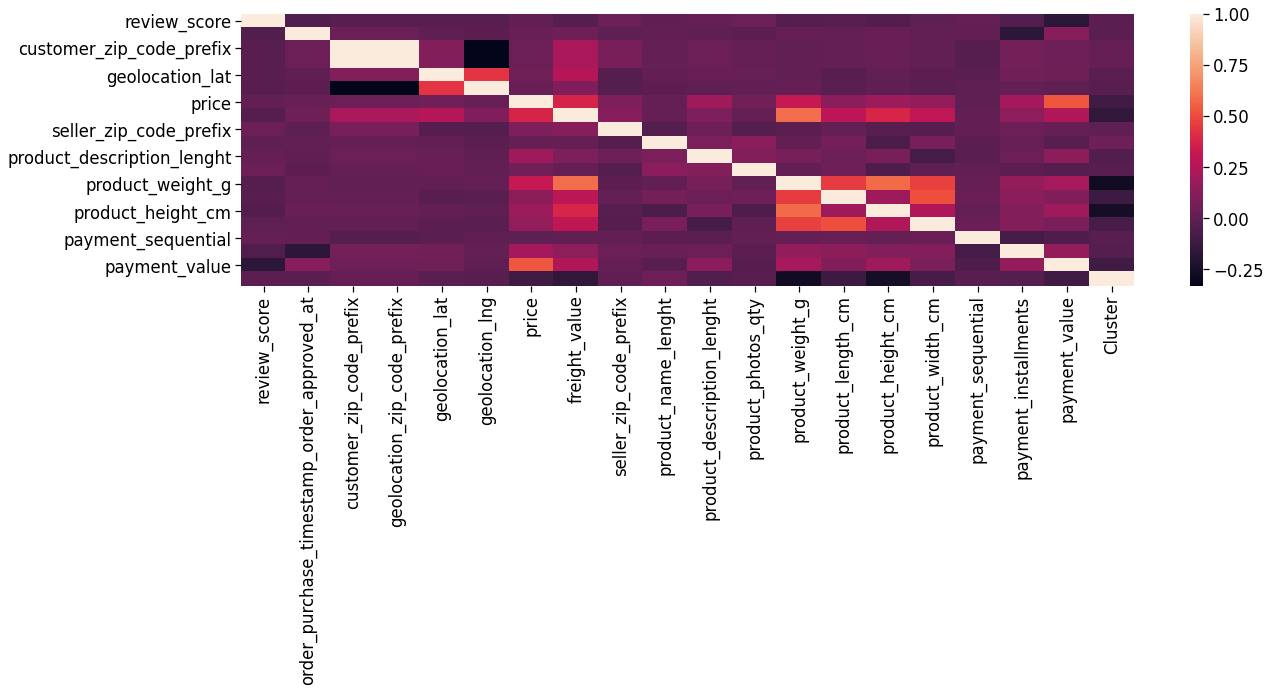

In [112]:
plt.figure(figsize=(20,5))
sns.heatmap(corr_matrix)
plt.show()

In [113]:
# To consider Brazilian calendar and holidays
# !pip install workalendar

from workalendar.america import Brazil

cal = Brazil()

## Creating a Custom Transformer for FeatEng
We need to guarantee that we are apply exactly the same transformation to new/unseen data. To do that we will create custom transformers using scikit-learn BaseEstimator.

This first custom transformer will do the feature engineering that we just described earlier.

In [114]:
orders.columns

Index(['review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date',
       'order_purchase_timestamp_order_approved_at',
       'order_approved_at_order_delivered_carrier_date',
       'order_delivered_carrier_date_order_delivered_customer_date',
       'order_purchase_timestamp_order_delivered_customer_date',
       'order_purchase_weekday', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'geolocation_zip_code_prefix', 'geolocation_city',
       'geolocation_state', 'geolocation_lat', 'geolocation_lng',
       'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_wei

In [117]:
orders.head()

,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,Cluster,order_aproved_at
0,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17,...,30.0,30.0,35.0,sports_leisure,1,credit_card,8,397.26,3,2018-01-11
1,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17,...,30.0,30.0,35.0,sports_leisure,1,credit_card,8,397.26,3,2018-01-11
2,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17,...,30.0,30.0,35.0,sports_leisure,1,credit_card,8,397.26,3,2018-01-11
3,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17,...,30.0,30.0,35.0,sports_leisure,1,credit_card,8,397.26,3,2018-01-11
4,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09,...,19.0,14.0,14.0,computers_accessories,1,credit_card,1,88.09,3,2018-02-28


In [125]:
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154312 entries, 0 to 154311
Data columns (total 44 columns):
review_score                                                  154312 non-null int64
review_comment_title                                          19448 non-null object
review_comment_message                                        69910 non-null object
review_creation_date                                          154312 non-null object
review_answer_timestamp                                       154312 non-null object
order_status                                                  154312 non-null object
order_purchase_timestamp                                      154312 non-null datetime64[ns]
order_approved_at                                             154312 non-null datetime64[ns]
order_delivered_carrier_date                                  154312 non-null object
order_delivered_customer_date                                 154312 non-null datetime64[ns]
order_estimated_de

In [134]:
type(orders['order_approved_at'][0])

# orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
# orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
# orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])


pandas._libs.tslibs.timestamps.Timestamp

In [173]:
from sklearn.base import BaseEstimator, TransformerMixin

class AttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass    
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        df = X.copy()
        
        # Calculate the estimated delivery time and actual delivery time in working days. 
        # This would allow us to exclude hollidays that could influence delivery times.
        # If the order_delivered_customer_date is null, it returns 0.
#         df['wd_estimated_delivery_time'] = df.apply(lambda x: cal.get_working_days_delta(x.order_approved_at, x.order_estimated_delivery_date), axis=1)
#         df['wd_actual_delivery_time'] = df.apply(lambda x: cal.get_working_days_delta(x.order_approved_at, x.order_delivered_customer_date), axis=1)

        
        df['wd_estimated_delivery_time'] = pd.to_datetime(df.order_approved_at).dt.date - pd.to_datetime(df.order_estimated_delivery_date).dt.date
        df['wd_actual_delivery_time'] = pd.to_datetime(df.order_approved_at).dt.date - pd.to_datetime(df.order_delivered_customer_date).dt.date
        
        
        # Calculate the time between the actual and estimated delivery date. If negative was delivered early, if positive was delivered late.
        df['wd_delivery_time_delta'] = df.wd_actual_delivery_time - df.wd_estimated_delivery_time


        # Calculate the time between the actual and estimated delivery date. If negative was delivered early, if positive was delivered late.
        df['is_late'] = df.order_delivered_customer_date > df.order_estimated_delivery_date
        
        # Calculate the average product value.
        # df['average_product_value'] = df.price / df.order_items_qty

        # Calculate the total order value
        df['total_order_value'] = df.price + df.freight_value
        
        # Calculate the order freight ratio.
        df['order_freight_ratio'] = df.freight_value / df.price
        
        # Calculate the order freight ratio.
        df['purchase_dayofweek'] = df.order_purchase_timestamp.dt.dayofweek
                       
        # With that we can remove the timestamps from the dataset
        cols2drop = ['order_purchase_timestamp', 'order_aproved_at', 'order_estimated_delivery_date', 'order_delivered_customer_date']
        df.drop(cols2drop, axis=1, inplace=True)
        
        return df[['product_photos_qty', 
                   'product_description_lenght', 
                   'product_weight_g', 
                   'freight_value', 
                   'product_height_cm',
                   'payment_installments',
                   'order_freight_ratio',
                   'payment_value',
                   'is_late']]

### New Features - Working Days
Analysing the dataframe we see that the new features were succesfully created.

In [174]:
# Executing the estimator we just created
attr_adder = AttributesAdder()
feat_eng = attr_adder.transform(strat_train_set)
feat_eng.head(3)

,product_photos_qty,product_description_lenght,product_weight_g,freight_value,product_height_cm,payment_installments,order_freight_ratio,payment_value,is_late
73875,4.0,1159.0,350.0,34.19,14.0,1,0.621636,356.76,False
138300,7.0,93.0,250.0,7.39,2.0,1,0.150816,53.12,False
61367,10.0,1774.0,6900.0,14.32,69.0,1,0.220647,237.67,False


### Correlation
What is the correlation of the features we have just created with the review score?

In [209]:
corr_matrix = feat_eng.corr()
corr_matrix['review_score'].sort_values(ascending=False)

KeyError: 'review_score'

In [ ]:
feat_eng.columns

In [ ]:
feat_eng=feat_eng[['review_score', 
                   'product_photos_qty', 
                   'product_description_lenght', 
                   'product_weight_g', 
                   'freight_value', 
                   'product_height_cm',
                   'payment_installments',
                   'order_freight_ratio',
                   'payment_value',
                   'is_late']]


# review_score                                  1.000000
# product_photos_qty                            0.039225
# product_description_lenght                    0.020525
# product_weight_g                             -0.029277
# freight_value                                -0.029450
# product_height_cm                            -0.042216
# payment_installments                         -0.048940
# order_freight_ratio                          -0.093873
# payment_value                                -0.170389
# is_late                                      -0.296303

Looks ok, there aren't any strong correlation. But it is clear that if a customer will give a lower score if he gets an order after the estimated date. 

## Any missing values?
Let's see if there are any missing values.

In [ ]:
feat_eng.info()

Great! No missing values after this transformation!

# e. Data Viz
Now let's visually explore this dataset a little bit!

# f. Dealing with Categorical and Numerical Attributes
The way we handle categorical data is very different from the transformations needed for numerical features. We will create a transformer to select only categorical or numerical features for processing.

In [176]:
# selecting the numerical and text attributes
cat_attribs = ['order_status', 'customer_state', 'product_category_name_english']
num_attribs = orders_features.drop(cat_attribs, axis=1).columns

In [177]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attribute_names]

## Numerical Attributes
Creating pipelines to handle unseen data

In [178]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# for now we wont work with categorical data. Planning to add it on next releases
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)),
                         ('attribs_adder', AttributesAdder()),
                         ('std_scaller', StandardScaler())
                        ])

In [210]:
orders_features.isin(["PESSIMA"]).any(axis=0)

review_comment_title                                           True
review_comment_message                                        False
review_creation_date                                          False
review_answer_timestamp                                       False
order_status                                                  False
order_purchase_timestamp                                      False
order_approved_at                                             False
order_delivered_carrier_date                                  False
order_delivered_customer_date                                 False
order_estimated_delivery_date                                 False
order_purchase_timestamp_order_approved_at                    False
order_approved_at_order_delivered_carrier_date                False
order_delivered_carrier_date_order_delivered_customer_date    False
order_purchase_timestamp_order_delivered_customer_date        False
order_purchase_weekday                          

In [180]:
# lets see how the resulting data looks like
orders_features_prepared = num_pipeline.fit_transform(orders_features)
orders_features_prepared

array([[ 1.14967968e+00,  5.96545001e-01, -4.64149116e-01, ...,
         5.10646709e-01,  2.49718070e-01, -2.58706064e-01],
       [ 2.96936301e+00, -1.05251332e+00, -4.91339871e-01, ...,
        -4.20851147e-01, -4.24930605e-01, -2.58706064e-01],
       [ 4.78904633e+00,  1.54792480e+00,  1.31684530e+00, ...,
        -2.82693769e-01, -1.48844546e-02, -2.58706064e-01],
       ...,
       [-6.70003639e-01,  8.23947978e-01, -5.32126002e-01, ...,
        -2.44324466e-01, -3.80426544e-01, -2.58706064e-01],
       [-6.70003639e-01,  3.59860270e-01, -2.46623081e-01, ...,
        -3.22718937e-01, -2.39754392e-03, -2.58706064e-01],
       [ 2.96936301e+00,  5.76434534e-01,  9.08983982e-01, ...,
        -4.16754730e-01, -2.10209066e-01, -2.58706064e-01]])

# g. Selecting a Model
Start simple.

## Linear Regression

In [181]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(orders_features_prepared, orders_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [182]:
some_data = orders_features.iloc[:8]
some_labels = orders_labels.iloc[:8]
some_data_prepared = num_pipeline.transform(some_data)

In [183]:
print('Predicted: {} \n Labels: {}'.format(list(lin_reg.predict(some_data_prepared)), list(some_labels.values)))

Predicted: [4.029677857430728, 4.26922929851844, 4.171760061584102, 4.144235254267925, 3.7580972038674605, 4.045171746456298, 4.099355961911092, 4.155273807815974] 
 Labels: [4, 5, 5, 4, 2, 5, 5, 1]


Looks like we are not even close to predicting the right values. Lets see whats the root mean squared error.

In [184]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(orders_features_prepared)
lin_mse = mean_squared_error(orders_labels, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.38933053798585

A typical prediction error of about 1.25 is not at all satisfying when we are trying to predict values that range from 1 to 5.  So let's try a different model.

In [196]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(orders_features_prepared, orders_labels)

predictions = forest_reg.predict(orders_features_prepared)
forest_mse = mean_squared_error(orders_labels, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

/Users/shailazaman/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.49387521591599237

In [197]:
result_df = pd.DataFrame(list(zip(orders_labels, predictions, orders_labels-predictions)), columns =['Actual', 'Prediction', 'Difference']) 
result_df

,Actual,Prediction,Difference
0,4,4.00,0.00
1,5,4.18,0.82
2,5,5.00,0.00
3,4,3.90,0.10
4,2,2.30,-0.30
...,...,...,...
123444,5,5.00,0.00
123445,1,1.00,0.00
123446,5,5.00,0.00
123447,5,5.00,0.00


In [198]:
result_df.to_csv('../../Data/curated-data/rf_regressor_result.csv')

In [207]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest_reg = RandomForestClassifier()
forest_reg.fit(orders_features_prepared, orders_labels)

predictions = forest_reg.predict(orders_features_prepared)
accuracy = accuracy_score(orders_labels, predictions)
accuracy

/Users/shailazaman/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.953365357354049

In [208]:
result_df = pd.DataFrame(list(zip(orders_labels, predictions, orders_labels==predictions)), columns =['Actual', 'Prediction', 'isAccurate']) 
result_df

,Actual,Prediction,isAccurate
0,4,4,True
1,5,5,True
2,5,5,True
3,4,4,True
4,2,2,True
...,...,...,...
123444,5,5,True
123445,1,1,True
123446,5,5,True
123447,5,5,True


In [202]:
result_df.to_csv('../../Data/curated-data/rf_classifier_result.csv')

Much better! We got a typical error of 0.53 with Random Forest. Looks like it's a good algorithm! Let's see some examples of predictions.

In [204]:
print('Predicted: {} \n Labels: {}'.format(list(forest_reg.predict(some_data_prepared)), list(some_labels.values)))

Predicted: [4, 5, 5, 4, 2, 5, 5, 3] 
 Labels: [4, 5, 5, 4, 2, 5, 5, 1]


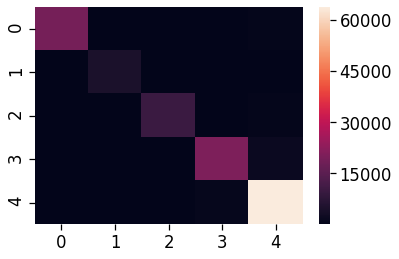

In [211]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(orders_labels, predictions)
sns.heatmap(confusion_mat)
plt.show()

# Next steps

1. Cross validation
2. Grid search
3. Full pipeline - transform and predict data
4. Validation on test set
5. Constructing a conclusion